In [1]:
#importing the require packages

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
#loading the dataset and checking it

df = pd.read_csv('50_startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,140143.50,NaN,NaN,Florida,134307.35


In [3]:
#looking at some of the statical values to better understand the data

df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,53.000000,51.000000,52.000000,52.000000
mean,75374.625283,120805.798627,206471.538269,113097.331923
std,46133.031203,28001.877707,123424.029117,39902.857207
min,0.000000,51283.140000,0.000000,14681.400000
25%,44069.950000,102101.520000,125324.665000,90518.427500
50%,73994.560000,122616.840000,208157.655000,108643.015000
75%,114523.610000,144606.780000,298932.675000,142253.990000
max,165349.200000,182645.560000,471784.100000,192261.830000


In [4]:
#Data Preprocessing

#Removing all the rows with nan values, if not they will affect our model's accuracy

print(df.isnull().sum())
df = df.dropna()          #inbuilt function of pandas.Dataframe to remove all the nan values
df.describe()

R&D Spend          0
Administration     2
Marketing Spend    1
State              1
Profit             1
dtype: int64


,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
#Changing all the zeros to nan so that we can fill them with relevant values

df = df.replace(0.0, np.nan)
df.isnull().sum()

R&D Spend          2
Administration     0
Marketing Spend    3
State              0
Profit             0
dtype: int64

In [6]:
#Replacing all the zeros that were converted into nan before by the mean of those columns

df['R&D Spend'].fillna(df['R&D Spend'].mean(), inplace = True)
df['Marketing Spend'].fillna(df['Marketing Spend'].mean(), inplace = True)
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
#Checking the correlation matrix of the data

df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.268979,0.666533,0.881354
Administration,0.268979,1.000000,-0.070590,0.200717
Marketing Spend,0.666533,-0.070590,1.000000,0.693088
Profit,0.881354,0.200717,0.693088,1.000000


In [8]:
#Checking the number of startups in each State

Startups_in_New_York = df.loc[df['State']=='New York']
Startups_in_California = df.loc[df['State']=='California']
Startups_in_Florida = df.loc[df['State']=='Florida']
print("Number of startups in New York", len(Startups_in_New_York))
print("Number of startups in California", len(Startups_in_California))
print("Number of startups in Florida", len(Startups_in_Florida))

Number of startups in New York 17
Number of startups in California 17
Number of startups in Florida 16


<Figure size 432x288 with 0 Axes>

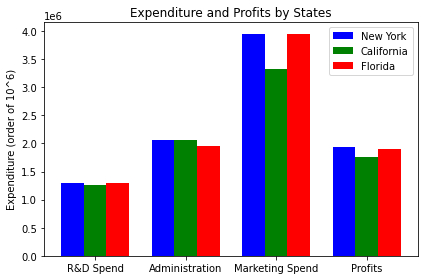

In [9]:
#Data Visualization

#Here we draw the plot bar graph of the spendings by the startups organised by States

fig = plt.figure()
fig, ax = plt.subplots()
cities = [i for i in df['State'].unique()]

#Get the total of the profits and spendings of the startups in each State

Profits = [round(Startups_in_New_York['Profit'].sum()), round(Startups_in_California['Profit'].sum()), \
           round(Startups_in_Florida['Profit'].sum())]
RD_Spend = [round(Startups_in_New_York['R&D Spend'].sum()), round(Startups_in_California['R&D Spend'].sum()), \
            round(Startups_in_Florida['R&D Spend'].sum())]
Administration = [round(Startups_in_New_York['Administration'].sum()), round(Startups_in_California['Administration'].sum()), \
                  round(Startups_in_Florida['Administration'].sum())]
Marketing = [round(Startups_in_New_York['Marketing Spend'].sum()), round(Startups_in_California['Marketing Spend'].sum()), \
             round(Startups_in_Florida['Marketing Spend'].sum())]

New_york = [RD_Spend[0], Administration[0], Marketing[0], Profits[0]]
California = [RD_Spend[1], Administration[1], Marketing[1], Profits[1]]
Florida = [RD_Spend[2], Administration[2], Marketing[2], Profits[2]]

#Draw the bar graph and set proper labels, legend, etc.,.

labels = ['R&D Spend', 'Administration', 'Marketing Spend', 'Profits']
X = np.arange(len(labels))
ax.set_title('Expenditure and Profits by States')
ax.bar(X - 0.25, New_york, color = 'b', width = 0.25, label='New York')
ax.bar(X + 0.00, California, color = 'g', width = 0.25, label='California')
ax.bar(X + 0.25, Florida, color = 'r', width = 0.25, label='Florida')

ax.set_ylabel('Expenditure (order of 10^6)')
ax.set_xticks(X)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

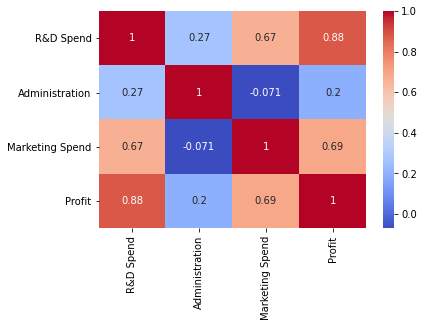

In [10]:
#Draw the heat map of the data for analysis

plt.figure()
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

Text(0.5, 0.98, 'Plot between R&d Spendings and Profit')

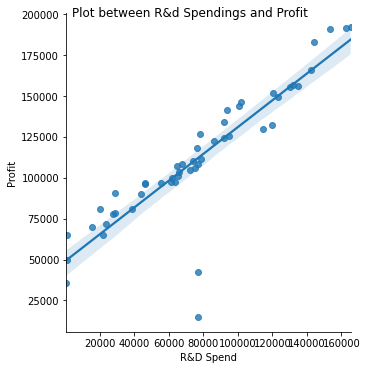

In [11]:
#Draw the graphs between each independant variable and dependant variable for analysis

sns.lmplot(x='R&D Spend', y='Profit', data=df).fig.suptitle("Plot between R&d Spendings and Profit", fontsize=12)

Text(0.5, 0.98, 'Plot between Administration Spendings and Profit')

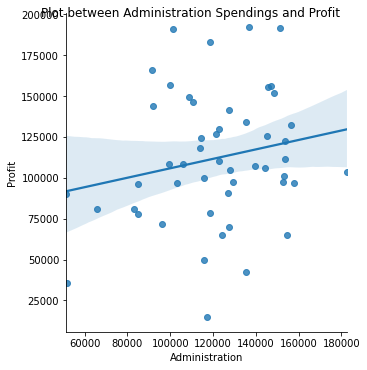

In [12]:
fig = sns.lmplot(x='Administration', y='Profit', data=df)
fig = fig.fig
fig.suptitle("Plot between Administration Spendings and Profit", fontsize=12)

Text(0.5, 0.98, 'Plot between Marketing Spendings and Profit')

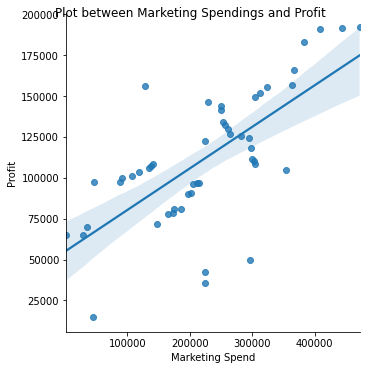

In [13]:
sns.lmplot(x='Marketing Spend', y='Profit', data=df).fig.suptitle("Plot between Marketing Spendings and Profit", fontsize=12)

In [14]:
#Data Preprocessing

#Perform one-hot encoding to reduce the ordinal data of State to a form that can be used to build the model

one_hot = pd.get_dummies(df['State'])
df = df.drop('State', axis=1)
df = df.join(one_hot)
prof = df['Profit']
df = df.drop('Profit', axis=1).join(prof)
df.head()

,R&D Spend,Administration,Marketing Spend,California,Florida,New York,Profit
0,165349.20,136897.80,471784.10,0,0,1,192261.83
1,162597.70,151377.59,443898.53,1,0,0,191792.06
2,153441.51,101145.55,407934.54,0,1,0,191050.39
3,144372.41,118671.85,383199.62,0,0,1,182901.99
5,142107.34,91391.77,366168.42,0,1,0,166187.94


In [15]:
#Check the correlation values

df.corr()

,R&D Spend,Administration,Marketing Spend,California,Florida,New York,Profit
R&D Spend,1.000000,0.268979,0.666533,-0.051912,0.062887,-0.010015,0.881354
Administration,0.268979,1.000000,-0.070590,-0.015478,0.010493,0.005145,0.200717
Marketing Spend,0.666533,-0.070590,1.000000,-0.189842,0.144084,0.047958,0.693088
California,-0.051912,-0.015478,-0.189842,1.000000,-0.492366,-0.515152,-0.145837
Florida,0.062887,0.010493,0.144084,-0.492366,1.000000,-0.492366,0.116244
New York,-0.010015,0.005145,0.047958,-0.515152,-0.492366,1.000000,0.031368
Profit,0.881354,0.200717,0.693088,-0.145837,0.116244,0.031368,1.000000


In [16]:
#Remove the column of New-York to prevent 'Dummy Variable Trap', which is caused due to the redundant data that
#was obtained due to the one hot encoding performed on States column

df = df.drop('New York', axis=1)
df.head()

,R&D Spend,Administration,Marketing Spend,California,Florida,Profit
0,165349.20,136897.80,471784.10,0,0,192261.83
1,162597.70,151377.59,443898.53,1,0,191792.06
2,153441.51,101145.55,407934.54,0,1,191050.39
3,144372.41,118671.85,383199.62,0,0,182901.99
5,142107.34,91391.77,366168.42,0,1,166187.94


In [17]:
#Building the model

#Split the data into train and test data(80% and 20%) 

X = df.iloc[:,:-1].values
y = df.iloc[:,5].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [18]:
#Train the model with the train dataset

regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

33616.46584790526
[ 6.45209703e-01  1.00425490e-01  8.15150660e-02 -6.68132451e+03
 -1.81773441e+03]


In [19]:
#Run the model trained on the test values to obtain the predicted values

predictions = regressor.predict(X_test)

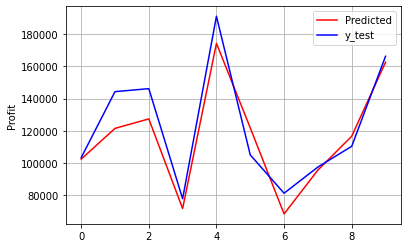

In [20]:
#Plot the values obtained by predicting using the model trained and the actual test values to evaluate our model's performance

plt.grid(True)
plt.plot(predictions, color = 'red', label = 'Predicted')
plt.plot(y_test, color = 'blue', label = 'y_test')
plt.legend()
plt.ylabel('Profit')
plt.show()